<a href="https://colab.research.google.com/github/MRazin172/LLM_Lab8/blob/main/Razin_534_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The fine-tuned model and tokenizer

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Load the fine-tuned model
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')

# Set the model to evaluation mode
model.eval()

# Example usage: Tokenize input and get model predictions
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.softmax(logits, dim=-1)
    return predictions

# Example input text
text = "This movie was absolutely fantastic!"

# Get predictions
predictions = predict(text)
print("Predictions:", predictions)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Predictions: tensor([[1.2557e-04, 9.9987e-01]])


In [11]:
pip install torch torchvision transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

#Handling multimodal inputs.

BERT Model for Text:

What it is: BERT is a pre-trained language model that understands text.
What it does: In this script, BERT takes a sentence (like "This is a sample text input.") and turns it into a bunch of numbers that represent the meaning of the text.

ResNet Model for Images:

What it is: ResNet-50 is a pre-trained model that can look at images and understand what's in them.
What it does: In this script, ResNet looks at an image and converts it into a bunch of numbers that represent the image's content.

Multimodal Model:

What it is: This is a custom model that combines the outputs (the numbers) from both BERT (text) and ResNet (image).
What it does: After combining the information from the text and the image, the model makes a prediction.

#How It Works
Input Text and Image:

You provide a sentence and an image.
The text is processed by BERT, which turns it into a series of numbers.
The image is processed by ResNet, which also turns it into a series of numbers.

Combining Information:

The model combines the numbers from both BERT (text) and ResNet (image) into one big set of numbers.

Making a Prediction:

The combined information is passed through a simple neural network that decides what the final output should be.

#Example
Imagine you have a picture of a happy dog and a caption that says, "This is a happy dog." The model would combine the understanding of the image and the text to predict whether it is actually a happy dog in the picture and the probability of the text being true to the image.

#Simplified Summary
This script combines what it understands from a sentence and a picture to make a guess or prediction. It's like how a person might look at a picture of a dog and read the word "happy" to decide that the overall message is positive.

Prediction: Ronaldo


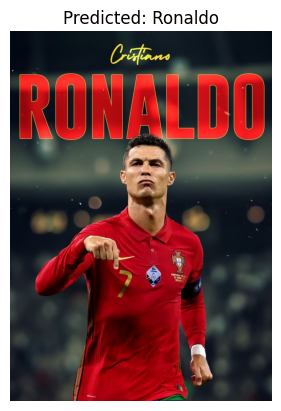

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms
from transformers import BertTokenizer, BertModel
from PIL import Image
import matplotlib.pyplot as plt

# Define a multimodal model combining text and image inputs
class MultimodalModel(nn.Module):
    def __init__(self, text_model, image_model, hidden_dim=256, num_classes=2):
        super(MultimodalModel, self).__init__()
        self.text_model = text_model
        self.image_model = image_model

        # Define a fully connected layer to combine features
        self.fc1 = nn.Linear(hidden_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, text_input, image_input):
        # Process text input
        text_output = self.text_model(text_input)[0][:, 0, :]  # Get the [CLS] token output

        # Process image input
        image_output = self.image_model(image_input)

        # Flatten the image output to match text output dimension
        image_output = image_output.view(image_output.size(0), -1)

        # Combine features
        combined_output = torch.cat((text_output, image_output), dim=1)

        # Pass through fully connected layers
        x = F.relu(self.fc1(combined_output))
        x = self.fc2(x)
        return x

# Load pre-trained models
text_model_name = 'bert-base-uncased'
text_model = BertModel.from_pretrained(text_model_name)
tokenizer = BertTokenizer.from_pretrained(text_model_name)

image_model = models.resnet50(pretrained=True)
num_ftrs = image_model.fc.in_features
image_model.fc = nn.Identity()  # Remove the classification layer

# Adjust the hidden dimension to match the combined feature size
hidden_dim = 768 + num_ftrs  # BERT hidden size + ResNet50 output size
model = MultimodalModel(text_model=text_model, image_model=image_model, hidden_dim=hidden_dim, num_classes=2)

# Define image and text preprocessing
image_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

def process_text(text):
    tokens = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    return tokens['input_ids']

def process_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return image_transform(image).unsqueeze(0)  # Add batch dimension

# Define class labels
class_labels = ["Messi", "Ronaldo"]

# Example usage
text_input = "This is a photo of Cristiano Ronaldo"
image_path = "/content/cr7jpg.jpg"  # Path to the image file

# Process inputs
text_tensor = process_text(text_input)
image_tensor = process_image(image_path)

# Make prediction
model.eval()
with torch.no_grad():
    prediction = model(text_tensor, image_tensor)
    predicted_class = torch.argmax(prediction, dim=1).item()

print("Prediction:", class_labels[predicted_class])

# Display the image and prediction
image = Image.open(image_path).convert('RGB')
plt.imshow(image)
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.axis('off')  # Hide axis
plt.show()
